# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [23]:
import pandas as pd
import numpy as np

env = pd.read_csv('/Users/delre/assignment-4/data/Arrigetch_Peaks_Environmental_Data.csv')
species = pd.read_csv('/Users/delre/assignment-4/data/Arrigetch_Peaks_Species_Data.csv')

env.head()
species.head()

print(env.shape) #env is 439 rows by 11 columns
print(species.shape) #species is 439 rows by 409 columns

env.replace(-9999, np.NaN, inplace=True)

len(env['PLANT_COMMUNITY_NAME'].unique()) #There are 51 unique plant communities

env2 = env.drop('TURBOVEG_PLOT_NUMBER', axis=1)
env2.describe()

combo = pd.merge(env, species, on='TURBOVEG_PLOT_NUMBER')
print(combo.head())

speciesFreq = species.copy()
speciesFreq.where(speciesFreq == 0, 1, inplace=True)
speciesFreq.drop('TURBOVEG_PLOT_NUMBER', axis=1, inplace=True)
print(speciesFreq)
speciesFreq.sum(axis=0).idxmax() #'Cetraria islandica' was present in the most plots

species2 = species.drop('TURBOVEG_PLOT_NUMBER', axis=1)
speciessum = species2.sum(axis=1)
finalspeciessum = pd.concat([species2, speciessum], axis=1)
finalspeciessum.rename(columns={0:'Totals'}, inplace=True)
finalspeciessum.head()

#Yes, there is an inconsistency
#The description does not match the data
#On the csv table each row is a certain turboveg plot and each column represents a different species
#The numbers indicate how many individuals of a speices are in a plot
#For example, if there were 5 individuals of the scepies Acer rubrum in plot 1, you would put a 5 in the row for plot 1 and column 'Acer rubrum'
#To fix the inconsistency I would change the description in the markdown to reflect this
#I would double click the plain text so I could edit it

(439, 11)
(439, 409)
   TURBOVEG_PLOT_NUMBER                            PLANT_COMMUNITY_NAME  \
0                 10925  Ass. Umbilicarietum pensylvanicae-carolinianae   
1                 10926  Ass. Umbilicarietum pensylvanicae-carolinianae   
2                 10927  Ass. Umbilicarietum pensylvanicae-carolinianae   
3                 10928  Ass. Umbilicarietum pensylvanicae-carolinianae   
4                 10929  Ass. Umbilicarietum pensylvanicae-carolinianae   

   ELEVATION  ASPECT  SLOPE  COVER_LITTER_LAYER  COVER_OPEN_WATER  COVER_ROCK  \
0     1090.0    45.0    NaN                   0                 0           0   
1      920.0   315.0    NaN                   0                 0           0   
2      940.0   270.0    NaN                   0                 0           0   
3      950.0   225.0    NaN                   0                 0           0   
4      935.0   270.0    NaN                   0                 0           0   

   COVER_CRUST  COVER_BARE_SOIL  ... Umbi

,Abietinella abietina,Acarospora schleicheri,Aconitum delphinifolium delphinifolium,Alectoria ochroleuca,Parmelia almquistii,Dactylina madreporiformis,Alnus crispa crispa,Amphidium mougeotii,Andreaea blyttii,Andreaea rupestris,...,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans,Totals
0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,2,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,79.5
1,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0.0,0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,101.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,135.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,84.0
4,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0.0,0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,84.5


## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




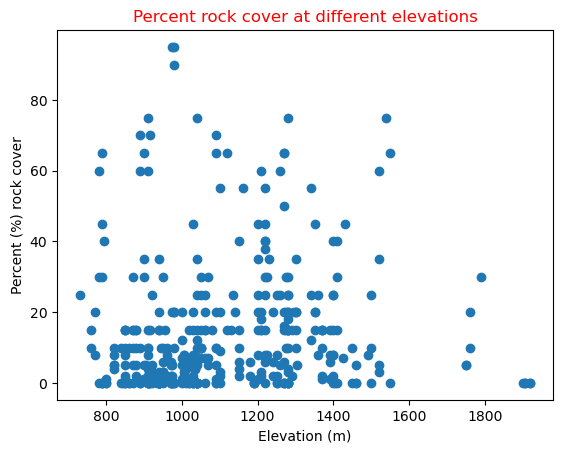

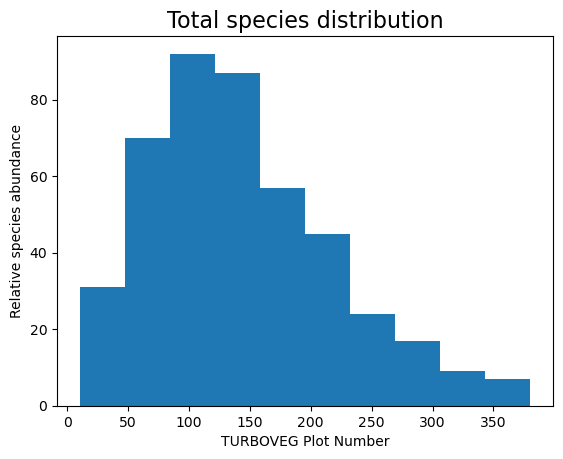

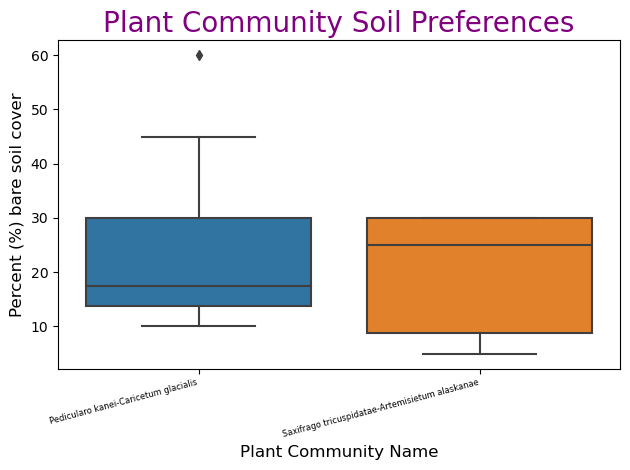

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

env = pd.read_csv('/Users/delre/assignment-4/data/Arrigetch_Peaks_Environmental_Data.csv')
species = pd.read_csv('/Users/delre/assignment-4/data/Arrigetch_Peaks_Species_Data.csv')

env.replace(-9999, np.NaN, inplace=True)

figure, ax = plt.subplots()
ax.scatter(env['ELEVATION'], env['COVER_ROCK'])
ax.set_title('Percent rock cover at different elevations', color="red")
ax.set_xlabel('Elevation (m)')
ax.set_ylabel('Percent (%) rock cover')
#There is no relationship between the two variables

figure, ax = plt.subplots() 
ax.hist(finalspeciessum['Totals']) 
ax.set_title('Total species distribution', fontsize=16)
ax.set_xlabel('TURBOVEG Plot Number')
ax.set_ylabel('Relative species abundance')
plt.show()

envsubset = env[(env.PLANT_COMMUNITY_NAME == 'Caricetum scirpoideaerupestris')|
                (env.PLANT_COMMUNITY_NAME=='Pedicularo kanei-Caricetum glacialis')|
                (env.PLANT_COMMUNITY_NAME=='Saxifrago tricuspidatae-Artemisietum alaskanae')]
graph = sns.boxplot(data=envsubset, x = 'PLANT_COMMUNITY_NAME', y='COVER_BARE_SOIL')
graph.set_xticklabels(graph.get_xticklabels(), fontsize=6, ha='right', rotation=15)
graph.set_title('Plant Community Soil Preferences', fontsize=20, color='purple')
graph.set_xlabel('Plant Community Name', fontsize=12)
graph.set_ylabel('Percent (%) bare soil cover', fontsize=12)
plt.tight_layout()
plt.show()

#ADD TITLES, UNITs, stuff like that to charts